# Метод штрафов. ADMM.

## Вступление

Ранее мы частенько работали с ERM на основе логистической регрессии, однако, в данной домашней работе к рассмотрению будет предложена функция, лежащая в основне SVM (чисто ради разнообразия). Ставится следующая задача оптимизации:
$$
\begin{equation}
\min \limits_{w \in \mathbb{R}^d} \frac{1}{2} \| w \|^2 + C \sum \limits_{i = 1}^n \max \left(1 - y_i \cdot \langle X_i, w \rangle , 0 \right).
\end{equation}
$$
Член с суммой есть ни что иное, как *hinge_loss*, довольно популярная функция потерь при обучении классификаторов.

## Основная часть (10 баллов)
## Все нижеизложенные решения неправильные, и я не знаю, как правильно, и...

__a) (1 балл)__ Переформулируйте задачу (1) в задачу оптимизации с ограничениями. *Подсказка*: попробуйте представить слагаемое в сумме как $s_i = (Bw)_i + e_i$, где $B \in \mathbb{R}^{n \times d}$ -- некоторая матрица, а $e \in \mathbb{R}^n$ -- вектор, составленный из единиц. Для удобства обозначений также замените суммирование на функцию
$$
p(s) = \sum \limits_{i = 1}^n \max(s_i, 0).
$$

__Ваше решение (Markdown)__

Примечание: вроде как достаточно объявить $p(s) = \sum \limits_{i = 1}^n s_i$, т.к. ограничения учтут максимум

Если осуществить предложенную замену $s_i = (Bw)_i + e_i$, а матрицу $B$ выбрать как $B = - Y X$, где $Y$ - диагональная матрица с элементами $y$, то задача примет вид

$$
\min \limits_{w \in \mathbb{R}^d, s \in \mathbb{R}^n} \frac{1}{2} \| w \|^2 + C p(s),
$$

а ограничения будут следующими:

$$
s \geq B w + e.
$$

__б) (1.5 балла)__ Для полученной задачи оптимизации с ограничениями напишите функцию Лагранжа $L(w, s, \lambda)$. В качестве ограничений можно взять функцию $s$.

__Ваше решение (Markdown)__

$$ L(w, s, \lambda) = \frac{1}{2} \| w \|^2 + C p(s) - \sum \limits_{i = 1}^n \lambda_i (s_i - (B w)_i - e_i) = $$
$$ = \frac{1}{2} \| w \|^2 + \sum \limits_{i = 1}^n (C - \lambda_i) s_i + \lambda^T B w + \lambda^T e$$

__в) (0.5 балл)__ Запишите расширенный Лагранжиан задачи $L_{\rho}(w, s, \lambda)$, введя параметр $\rho$.

__Ваше решение (Markdown)__

$$ L_{\rho}(w, s, \lambda) = L(w, s, \lambda) + \frac{\rho}{2} \| s - B w - e\|^2 = $$
$$ = \frac{1}{2} \| w \|^2 + \sum \limits_{i = 1}^n (C - \lambda_i) s_i + \lambda^T B w + \lambda^T e + \frac{\rho}{2} \| s - B w - e\|^2$$

__г) (2 балла)__ Как вы помните из лекции, на шаге алгоритма ADMM мы решаем задачу минимизации расширенного Лагранжиана по параметру $s$:
$$
\varphi (w) = \min \limits_{s} L_{\rho} (w, s, \lambda).
$$
Переформулируйте задача минимизации так, чтобы члены с $w$ и $\lambda$ были вытащены из под $\min$. То есть вид должен быть такой:
$$
\varphi (w) = c_1 \|w\|^2 + c_2 \| \lambda\|^2 + c_3 \min \limits_{s} \left[\|s - t(w)\|^2 + c_4 p(s) \right].
$$
Здесь $t(w)$ -- функция, которая зависит только от переменной $w$.

__Ваше решение (Markdown)__

Взяв производную по $s_i$, получим условие минимума:

$$ C - \lambda_i + \rho (s_i - (B w)_i - e_i) = 0 =>$$
$$ s_i = (B w)_i + e_i - \frac{1}{\rho} (C - \lambda_i)$$

Теперь подставим это в Лагранжиан...

$$ L_{\rho} (w, s, \lambda) = \frac{1}{2} \| w \|^2 + \sum \limits_{i = 1}^n (C - \lambda_i) (B w + e)_i - \frac{1}{\rho} \sum \limits_{i = 1}^n (C - \lambda_i)^2 + \lambda^T (B w + e) + \frac{1}{2 \rho} \sum \limits_{i = 1}^n (C - \lambda_i)^2 =$$
$$ = \frac{1}{2} \| w \|^2 + \sum \limits_{i = 1}^n C (B w + e)_i - \frac{1}{2 \rho} \sum \limits_{i = 1}^n (C - \lambda_i)^2 = $$
$$ = \frac{1}{2} \| w \|^2 + \sum \limits_{i = 1}^n C (B w + e)_i - \frac{1}{2 \rho} \sum \limits_{i = 1}^n (C^2 - 2 C \lambda_i + \lambda_i^2) = $$
$$ = \frac{1}{2} \| w \|^2 - \frac{1}{2 \rho} \| \lambda \|^2 + C \sum \limits_{i = 1}^n \left( (B w + e)_i - \frac{1}{2 \rho} (C - 2 \lambda_i) \right) = $$
$$ = \frac{1}{2} \| w \|^2 - \frac{1}{2 \rho} \| \lambda \|^2 + С \sum \limits_{i = 1}^n \left((B w)_i + e_i - \frac{1}{\rho} (C - \lambda_i)\right) + \frac{\rho}{2} \sum \limits_{i = 1}^n \left(\frac{1}{\rho} C \right)^2 = $$
$$ = \frac{1}{2} \| w \|^2 - \frac{1}{2 \rho} \| \lambda \|^2 + \frac{\rho}{2} \| \frac{1}{\rho} C \|^2 + C \sum \limits_{i = 1}^n s_i$$

Таким образом, с учётом, что последний член по определению равен $C p(s)$, получаем нужный вид при $t(w) = B w + e + \frac{\lambda}{\rho}$

__д) (2 балла)__ Вычислите градиент $\nabla \varphi (w)$ аналитически. Считайте, что в точке оптимума значение $s^* = s^*(w^*) = \text{Prox}_p^{\rho^{-1}} (t(w^*))$. Воспользовавшись знанием с предыдущих лекций, покажите, что 
$$
\left[ \text{Prox}_p^{\rho^{-1}}\left(z \right) \right]_i = \begin{cases} z_i - \frac{C}{\rho}, & z_i > \frac{C}{\rho},\\ 0, & 0 \leq z_i \leq \frac{C}{\rho}, \\ z_i, & z_i < 0. \end{cases}
$$

__Ваше решение (Markdown)__

$\nabla \varphi (w) = w + C B^T \mathbf{1}_n$

Покажем, чему равен проксимальный оператор:

$$ \text{Prox}_p^{\rho^{-1}}\left(z \right) = \arg\min\limits_{\tilde{z} \in \mathbb{R}^n} (\frac{C}{\rho} \sum \limits_{i = 1}^n \tilde{z_i} + \frac{1}{2} \| z - \tilde{z}\|^2)$$

1) В случае $z_i > \frac{C}{\rho}$ снимаем модуль, получаем условие на производную $\tilde{z_i} = z_i - \frac{C}{\rho}$
2) В случае $0 \leq z_i \leq \frac{C}{\rho}$ будет такая же производная, но $\tilde{z_i}$ ограничено снизу нулём, поэтому получаем 0
3) В случае $z_i < 0$ меняем знак при снятии модуля, получаем $\tilde{z_i} = z_i$

Суть в том, что при малых $z$ (случай 2) линейный член больше, чем квадратичный, поэтому мы зануляем точку, чтобы удовлетворить регуляризации. При больших $z$ квадратичный член больше и выгоднее быть ближе к нему, но регуляризация всё равно чуть меняет значение. При отрицательных $z$ (случай 3) регуляризация никак не влияет, потому что оптимальное решение $z = \tilde{z}$ и так ей удовлетворяет.

__е) (3 балла)__ Напомним основные итерации ADMM на $k$-ой итерации:
1. Вычислить новые значения $w^{k + 1}$ и $s^{k + 1}$ при решении задачи минимизации $\min \varphi (w)$:
$$w^* = \arg\min \varphi (w); \qquad s^* = s^*(w^*) = \text{Prox}_p^{\rho^{-1}} (t(w^*))$$
2. Обновить параметр $\lambda^{k + 1}$ по теории (_покажите это!_):
   $$\lambda^{k + 1} = \lambda^{k} - \rho (s - Bw - e).$$ 

Реализуйте метод ```ADMM``` для решения задачи оптимизации ```hinge_loss```, проверьте сходимости при разных значениях коэффициента $C$. Рассмотрите следующие значения: [1e-10, 1e-8, 1e-6]. Параметр $\rho$ положите равным 1. Критерием останова будет являться норма градиента функции $\phi$ в новой точке.

In [6]:
# Ваше решение (Markdown + Code)
import numpy as np
from tqdm import tqdm

def ADMM(criterion, X, y, w_0, s_0, lambda_0, C, rho, eps, max_iter):

    errors = []

    w_k = np.copy(w_0)
    s_k = np.copy(s_0)
    lambda_k = np.copy(lambda_0)

    B = -np.diag(y) @ X
    
    err_x_0 = criterion(w_k, B, C)
    errors.append(criterion(w_k, B, C) / err_x_0)
    for k in tqdm(range(max_iter)):

        # your code
        # для нахождения w используем градиентный спуск (взял из 1-го дз)
        # параметры max_iter и gamma для него взял наугад
        w_k, _ = GradientDescent(grad, criterion_gd, w_k, B, C, 1e-6, 10, gamma=lambda k: 0.1)
        s_k = prox(B @ w_k + np.ones_like(s_k) + lambda_k / rho, C, rho)

        lambda_k -= rho * (s_k - B @ w_k - np.ones_like(s_k))
       
        errors.append(criterion(w_k, B, C) / err_x_0)
        if errors[-1] < eps:
            break
            
    return w_k, s_k, lambda_k, errors

def criterion_admm(w, B, C):   
    grad_norm = np.linalg.norm(w + C * np.sum(B, axis=0))**2
    return grad_norm

def prox(x, C, rho):
    x_prox = np.zeros_like(x)
    for i in range(len(x_prox)):
        if x[i] > C / rho:
            x_prox[i] = x[i] - C / rho
        elif x[i] < 0:
            x_prox[i] = x[i]
        # случай, когда между, не описан, т.к. массив и так нулевой
    return x_prox

In [2]:
def GradientDescent(grad, criterion_gd, x_0, B, C, eps, max_iter, **params):
    errors = []

    x_k = np.copy(x_0)
    err_x_0 = criterion_gd(x_k, B, C)
    errors.append(criterion_gd(x_k, B, C) / err_x_0)
    for k in range(max_iter):

        # your code
        x_k = x_k - params['gamma'](k) * grad(x_k, B, C)

        errors.append(criterion_gd(x_k, B, C) / err_x_0)
        if errors[-1] < eps:
            break

    return x_k, errors

def grad(w, B, C):
    return w + C * np.sum(B, axis=0)

def criterion_gd(x, B, C):
    return np.linalg.norm(grad(x, B, C))**2

 17%|████████████                                                           | 17/100 [00:00<00:00, 149.53it/s]


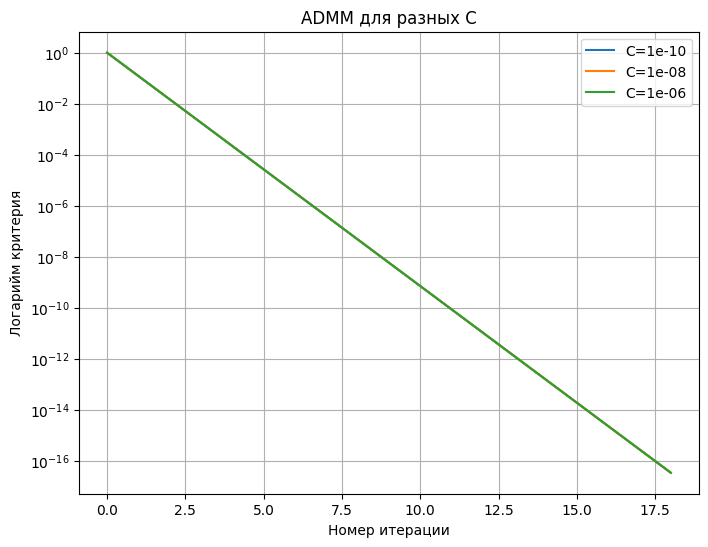

In [8]:
dataset = "mushrooms.txt" 

from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

#(преобразуйте метки к формату [-1, +1])
y = y * 2 - 3

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

import matplotlib.pyplot as plt

C_values = [1e-10, 1e-8, 1e-6]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for C_ in C_values:
    w_ = np.zeros(X_train.shape[1])
    s_ = np.zeros(X_train.shape[0])
    lambda_ = np.zeros(X_train.shape[0])

    w_admm, s_admm, lambda_admm, errors_admm = ADMM(criterion_admm, X_train, y_train, w_, s_, lambda_, C_, 1,
                                                    eps=1e-16, max_iter=100)
    ax.plot(errors_admm, label=f"C={C_}")

ax.set_yscale("log")
ax.set_xlabel(r"Номер итерации")
ax.set_ylabel(r"Логарийм критерия")
ax.set_title(r"ADMM для разных C")
ax.legend()
ax.grid()
plt.show()

 Круто получилось! Жаль, что неправильно

## Дополнительная часть (всего 10 баллов)

__а) (3 балла)__ На лекции был использован метод первого порядка в качестве спуска по переменным. Однако, такой метод проигрывает по итеративной сложности методу Ньютона... Но функция-то в нашем случае не дважды диффиренцируема. Значит нужно рассматривать суб-гессиан. Найдите второй суб-дифференциал $\partial ^2 \varphi(w)$.

(*Указание:* возьмите честно второй раз дифференциал от формулы из пункта __д)__, используя градиент в тех местах, когда это возможно).

__Ваше решение (Markdown)__

$\partial ^2 \varphi(w) = I + ...$

В этот момент я окончательно убедился, что всё неправильно

__б) (7 баллов)__ Запишем теперь [полугладкий метод Ньютона](https://www.polyu.edu.hk/ama/profile/dfsun/A%20QUADRATICALLY%20CONVERGENT%20NEWTON%20METHOD%20FOR_published.pdf) для поиска аргмина. Так как мы не умеем вычислять точно гессиан оптимизируемой функции, то прибегнем к методу сопряженных градиентов для подсчета направления спуска. На $k$-ой итерации:
1. Выбрать элемент $V_k \in \partial^2 \varphi(w^k)$.
2. Выполнить процедуру сопряженного градиента для поиска аппроксимации решения $d^k$ уравнения
$$
V_k d^k + \nabla \varphi(w^k) = 0.
$$
3. При помощи линейного поиска, как в методе BFGS находим параметр $\alpha^k$ и делаем обновление переменной:
$$w^{k + 1} = w^k + \alpha_k d^k.$$

Теперь, мы наконец-то готовы все собрать в один метод ADMM. На $k$-ой итерации
1. Вычислить новые значения $w^{k + 1}$ используя полугладкий метод Ньютона.
2. Обновить $s^{k + 1} = \text{Prox}_{p}^{\rho^{-1}} (w^{k + 1})$.
3. Обновить параметр $\lambda^{k + 1}$ по теории.

Реализуйте метод ```ADMM_SemiSmoothNewton``` и постройте график зависимости критерия от итерации. Поиграйте со значениями параметров, постройте сравнительные графики.

In [ ]:
# Ваше решение (Code)

# Интересно почитать

Казалось бы, метод ADMM выглядит более громоздко, нежели привычные методы оптимизации без ограничений (SGD, NAG, DNM и другие), однако, на практике у него довольно много применений. Если вас заинтересовала возможность узнать больше о практических применения, рекоммендуется к прочтению [статья](https://web.stanford.edu/~boyd/papers/pdf/admm_distr_stats.pdf#page=64.25) от одного из столпов оптимизации Бойда. В ней рассматривается distributed подход (с множеством вычислительных единиц) к использованию метода ADMM при решении выпуклых задач оптимизации в машинном обучении и не только.   